In [26]:
# loading necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy
from pandas import DataFrame
from sklearn import linear_model
import statistics
from sklearn.metrics import accuracy_score
import scipy.stats as stats


In [27]:
df = pd.DataFrame(pd.read_csv("cancer.csv", encoding = 'latin1'))  #loading dataset

In [28]:
df.count()[1]   #count of number of rows

3047

In [29]:
df.TARGET_deathRate.mean()   #mean of observed death rate

178.66406301279972

In [30]:
df.info()   #description of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
avgAnnCount                3047 non-null float64
avgDeathsPerYear           3047 non-null int64
TARGET_deathRate           3047 non-null float64
incidenceRate              3047 non-null float64
medIncome                  3047 non-null int64
popEst2015                 3047 non-null int64
povertyPercent             3047 non-null float64
studyPerCap                3047 non-null float64
binnedInc                  3047 non-null object
MedianAge                  3047 non-null float64
MedianAgeMale              3047 non-null float64
MedianAgeFemale            3047 non-null float64
Geography                  3047 non-null object
AvgHouseholdSize           3047 non-null float64
PercentMarried             3047 non-null float64
PctNoHS18_24               3047 non-null float64
PctHS18_24                 3047 non-null float64
PctSomeCol18_24            762 non-null float64
PctBachDeg18_24     

In [31]:
df.head()   #glimpse of first five rows of data

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


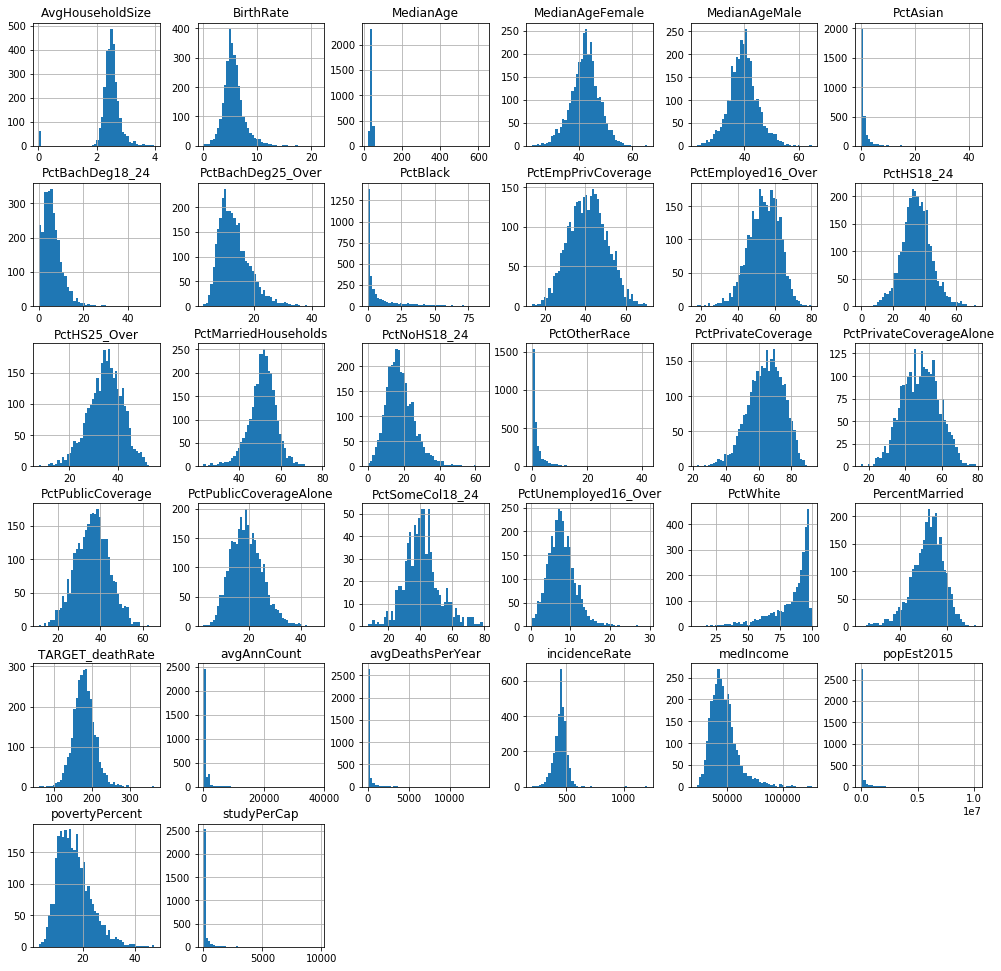

In [32]:
# exploring data by plotting histograms
df.hist(bins=50, figsize=(17,17))
plt.show()

In [33]:
df.isnull().sum()   #checking missing values

avgAnnCount                   0
avgDeathsPerYear              0
TARGET_deathRate              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2285
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     609
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOther

In [34]:
sh = df.drop( ['PctSomeCol18_24'], axis = 1)    #dropping column

In [35]:
# imputing mean values
sh.PctPrivateCoverageAlone.fillna(sh.PctPrivateCoverageAlone.mean(), inplace=True)
sh.PctEmployed16_Over .fillna(sh.PctEmployed16_Over .mean(), inplace=True)

In [36]:
sh.isnull().sum().sum()   #no missing values

0

In [37]:
sh.describe()    #summary 

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,9.018885,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,43.100000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.453774,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,53.800000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [38]:
sh.corr()   #checking correlation


,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.939408,-0.143532,0.073553,0.269145,0.926894,-0.135694,0.082071,-0.024098,-0.124969,...,0.166674,0.202349,-0.173548,-0.093699,-0.136501,0.031376,0.435071,0.209184,-0.106221,-0.034508
avgDeathsPerYear,0.939408,1.000000,-0.090715,0.062690,0.223207,0.977634,-0.066918,0.063488,-0.024599,-0.148487,...,0.112221,0.160124,-0.131687,-0.027338,-0.187159,0.084607,0.443074,0.215149,-0.160266,-0.074420
TARGET_deathRate,-0.143532,-0.090715,1.000000,0.449432,-0.428615,-0.120073,0.429389,-0.022285,0.004375,-0.021929,...,-0.326067,-0.267399,0.404572,0.449358,-0.177400,0.257024,-0.186331,-0.189894,-0.293325,-0.087407
incidenceRate,0.073553,0.062690,0.449432,1.000000,-0.001036,0.026912,0.009046,0.077283,0.018089,-0.014733,...,0.098846,0.149825,0.046109,0.040812,-0.014510,0.113489,-0.008123,-0.208748,-0.152176,-0.118181
medIncome,0.269145,0.223207,-0.428615,-0.001036,1.000000,0.235523,-0.788965,0.044003,-0.013288,-0.091663,...,0.706956,0.747294,-0.754822,-0.719756,0.167225,-0.270232,0.425844,0.083635,0.446083,-0.010195
popEst2015,0.926894,0.977634,-0.120073,0.026912,0.235523,1.000000,-0.065299,0.055722,-0.025219,-0.176608,...,0.121365,0.158650,-0.160066,-0.041469,-0.190095,0.073044,0.464168,0.241468,-0.127979,-0.057740
povertyPercent,-0.135694,-0.066918,0.429389,0.009046,-0.788965,-0.065299,1.000000,-0.055652,-0.029280,-0.214001,...,-0.682760,-0.683100,0.651162,0.798642,-0.509433,0.511530,-0.157289,0.047096,-0.604953,-0.012283
studyPerCap,0.082071,0.063488,-0.022285,0.077283,0.044003,0.055722,-0.055652,1.000000,-0.026030,-0.036647,...,0.068599,0.100063,-0.051497,-0.055512,0.023291,-0.019761,0.062543,-0.015247,-0.051736,0.010676
MedianAge,-0.024098,-0.024599,0.004375,0.018089,-0.013288,-0.025219,-0.029280,-0.026030,1.000000,0.129119,...,-0.021466,-0.036926,0.049060,-0.003298,0.035009,-0.017173,-0.038424,-0.030277,0.014504,-0.008276
MedianAgeMale,-0.124969,-0.148487,-0.021929,-0.014733,-0.091663,-0.176608,-0.214001,-0.036647,0.129119,1.000000,...,-0.147824,-0.208664,0.398967,0.002479,0.398044,-0.242748,-0.238322,-0.266655,0.222278,-0.104105


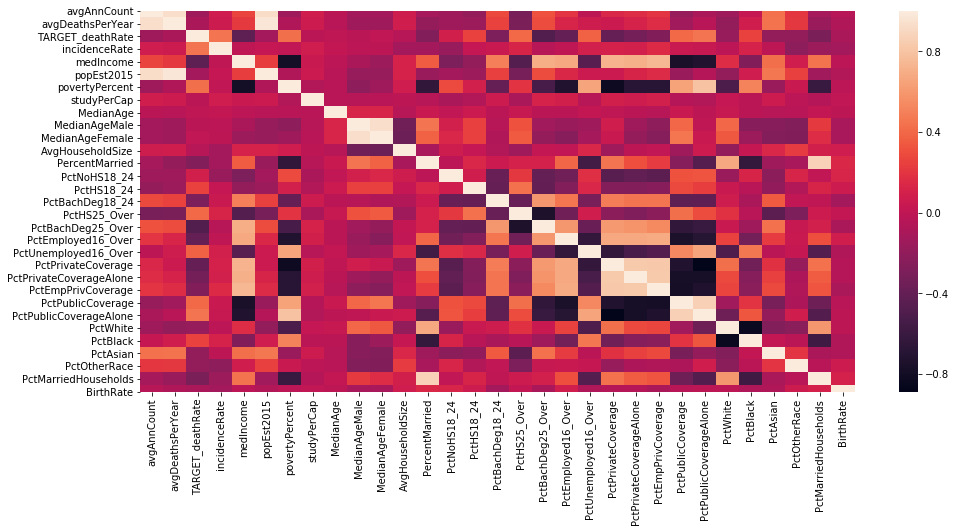

In [39]:
# plotting heat map
plt.figure(figsize = (16,7))
fg = sns.heatmap(sh.corr())


In [40]:
#arranging correlated attributes in a data frame
feature_names = ['TARGET_deathRate','incidenceRate','medIncome','povertyPercent','PctHS25_Over','PctBachDeg25_Over','PctPublicCoverage','PctPublicCoverageAlone']

In [16]:
df2 = DataFrame(sh, columns = feature_names)

In [42]:
# Arranging correlated attributes to fit in model
X = df2[['incidenceRate','medIncome','povertyPercent','PctHS25_Over','PctBachDeg25_Over','PctPublicCoverage','PctPublicCoverageAlone']]

In [41]:
#arranging response variable
Y = df2[['TARGET_deathRate']]

In [43]:
# performing linear regression
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y,X).fit()
predictions = model.predict(X) 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       TARGET_deathRate   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     399.0
Date:                Fri, 13 Dec 2019   Prob (F-statistic):               0.00
Time:                        20:24:21   Log-Likelihood:                -13456.
No. Observations:                3047   AIC:                         2.693e+04
Df Residuals:                    3039   BIC:                         2.698e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     53.1648      7.758      6.853      0.000      37.953      68.377
incidenceRate              0.2121      0.007     31.356      0.000       0.199       0.225
medIncome                 4.1e-05   6.68e-05      0.613      0.540      -9e-05       0.000
povertyPercent             0.9260      0.126      7.377      0.000       0.680       1.172
PctHS25_Over               0.6458      0.086      7.539      0.000       0.478       0.814
PctBachDeg25_Over         -0.9975      0.133     -7.485      0.000      -1.259      -0.736
PctPublicCoverage         -0.3903      0.111     -3.520      0.000      -0.608      -0.173
PctPublicCoverageAlone     0.9249      0.160      5.768      0.000       0.610       1.239
==============================================================================
Omnibus:                      177.758   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              723.212
Skew:                           0.083   Prob(JB):                    9.05e-158
Kurtosis:                       5.381   Cond. No.                     1.04e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
print(predictions[0:20]) #printing predicted death rates

0     165.487966
1     155.811931
2     148.722108
3     178.663064
4     151.464404
5     186.522532
6     189.942810
7     168.533082
8     187.641446
9     181.566244
10    140.481809
11    180.894865
12    161.152247
13    167.695437
14    167.862866
15    178.667415
16    166.979834
17    177.132870
18    164.381944
19    171.263437
dtype: float64


In [21]:
df.TARGET_deathRate.head(20)

0     164.9
1     161.3
2     174.7
3     194.8
4     144.4
5     176.0
6     175.9
7     183.6
8     190.5
9     177.8
10    121.4
11    172.7
12    188.3
13    165.3
14    171.0
15    174.2
16    169.9
17    153.8
18    162.8
19    163.3
Name: TARGET_deathRate, dtype: float64

In [45]:
statistics.median(predictions)   #median value of predicted death rates

178.42601873922615

In [46]:
df.TARGET_deathRate.median()  #median value of observed death rates

178.1

In [47]:
statistics.mean(predictions)#mean value of predicted death rates

178.6640630128041

In [48]:
df.TARGET_deathRate.mean() #mean value of observed death rates

178.66406301279972